# Homework 04 - Numpy

### Exercise 1 - Terminology

Describe the following terms with your own words:

***numpy array:***\
(=ndarray) object type (one- or multi-dimensional) for storing/collecting items of the same data type and size (different size works, but the advantages of a numpy array will be lost -> I think because then we get an array which contains lists?)

***broadcasting:***\
describes how NumPy handles arrays of different size/shape when performing arithmetic operations, i.e. it allows element-wise operation on arrays with different size is possible. e.g. adding a scalar to an array

Answer the following questions:

***What is the difference between a Python list and a Numpy array?***\
A Python list can contain elements of different type and different size.
Whereas all elements of a NumPy array are of the same type and size. NumPy arrays are (i) more efficient in memory use, especially for a large number of elements, (ii) faster than lists, (iii) have optimized fuctions for element-wise operations (which can be principally done with lists, but then we have to write the functions on our own) 


***How can you avoid using loops or list comprehensions when working with Numpy?***\
By using vectorized operations 


***Give different examples of usages of square brackets `[]` in Python and Numpy? Describe at least two completely different ones!***\
*Python:*
* creating a 2-dim list `unity_list = [[1,0,0],[0,1,0],[0,0,1]]`
* indexing `unity_list[2]` and `unity_list[2][2]` 
* arithmetic operations with lists of different size not possible `unity_list[1] + 1`

*NumPy:*
* creating a 2-dim array `unity_matrix = np.array([[1., 0., 0.],[0., 1., 0.],[0., 0., 1.]])`
* indexing `a[0]`and `a[2:]` (actually the same as for a list in Python)
* arithmetic operations with arrays of different size `unity_array[1] + 10`

***Give different examples of usages of round brackets `()` in Python and Numpy? Describe at least two completely different ones! (Bonus: give a third example not covered in the lecture until now!)***\
*Python*
* creating a 2-dim tuple: `a=((1.,0.,0.),(0.,1.,0.),(0.,0.,1.))` or a list of tuples `a=[(1.,0.,0.),(0.,1.,0.),(0.,0.,1.)]`

*Numpy*
* creating a 2-dim array `a=np.array(((1.,0.,0.),(0.,1.,0.),(0.,0.,1.)))` or  `a=np.array([(1.,0.,0.),(0.,1.,0.),(0.,0.,1.)])`-> we get the same result as with using square brackets `[]`

### Exercise 2 - rotate and plot points in 2D

Plot the 5 points in 2D defined in the array `points`, then rotate the points by 90 degrees by performing a matrix multiplication with a [rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix) by using `rotation_matrix @ points` and plot the result in the same plot. The rotation angle needs to be converted to radians before it is passed to `np.cos()` and `np.sin()`, use `np.radians(90)` to do so.

In [41]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[0, 0],
                   [1, 1],
                   [-1, -1],
                   [0, 1],
                   [0, 0.7],
                  ]).T
#print(points)

theta = np.radians(90)
cosine = np.cos(theta)
sine = np.sin(theta)

# Rotation matrix
rotation_matrix = np.array([[cosine, -sine],
                            [sine, cosine]])

# use the @-operator for matrix multiplication
points_rotated = rotation_matrix @ points
#print(points_rotated)



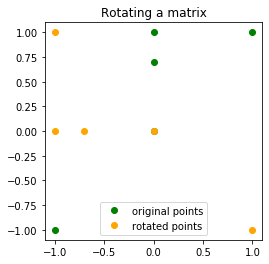

In [42]:
## Plot the points and the rotated points

plt.plot(points[0], points[1], "o", label='original points', color = "green")
plt.plot(points_rotated[0], points_rotated[1], "o", label='rotated points', color = "orange")

# same scaling for x and y axis
plt.gca().set_aspect('equal')
plt.legend(loc = "lower center")
plt.title("Rotating a matrix")

plt.show()

The result should like like this:

In [43]:
#plt.plot(*points, 'o', label='original points')
#plt.plot(*points_rotated, 'o', label='rotated points')
#plt.gca().set_aspect('equal')

### Exercise 3 - Flatten the curve

Copy the function `new_infections(t, k)` from last week's homework (exercise 3) and re-do the exercise using Numpy arrays instead of Python lists.

What needs to be changed in the function `new_infections(t, k)` to make this work?\
-> now we use the `np.exp()` instead of `math.exp()` function

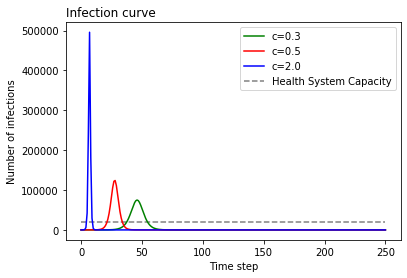

In [44]:
def new_infection(t,c):
    P = 1_000_000 # constant population
    k = c/P
    i_0 = 1
    temp_e = np.exp(-k * P * t) # change to np.exp()
    temp_p = (-1 + (P / i_0))
    
    i_t = (temp_e * k * P**2 * temp_p) / (1 + temp_e * temp_p)**2
    
    return i_t


# Test function with the same values as used in homework03
t = np.arange(251) 

infected_v1 = new_infection(t, 0.3) # now we can pass the ndarray for t directly to the function instead of using list comprehension
plt.plot(infected_v1, color = "green", label = "c=0.3")

infected_v2 = new_infection(t, 0.5)
plt.plot(infected_v2, color = "red", label = "c=0.5")

infected_v3 = new_infection(t, 2)
plt.plot(infected_v3, color = "blue", label = "c=2.0")

# Let's assume a health system capacity of 20000
plt.hlines(y = 20000, xmin = 0, xmax = 250, color = "grey", linestyles = "dashed", label = "Health System Capacity")

plt.xlabel("Time step")
plt.ylabel("Number of infections")
plt.title("Infection curve", loc = "left")
plt.legend()
plt.show()


### Exercise 4 - Mean of random numbers

Generate 100 random values between 0 and 1 (uniformly distributed) and plot them. Then calculate the mean value of the first i values for $i=1,\ldots,100$ and plot this list too.

To solve the exercise find out how to generate random values with Numpy! How did you find an answer? Which possible ways are there? List at least ***2 to 5 different ways*** to look up what a numpy function does!

Note: To solve this exercise, a list comprehension is necessary. Pure Numpy is faster, but probably not a good idea here.

**Finding information about NumPy functions**
* NumPy Documentation https://numpy.org/ (I would say that the official documentation is the most reliable source for more information)
* special issues or the answer to some problems can be found on stackoverflow.com
* for the rest: ask google ;)

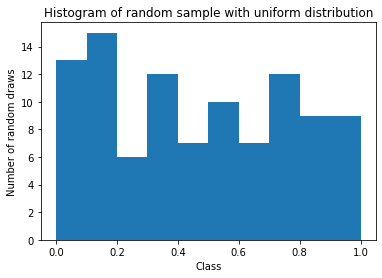

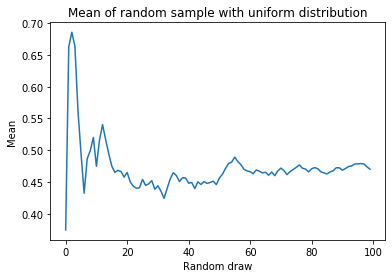

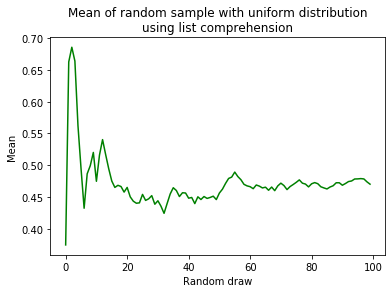

In [65]:
np.random.seed(42)

# looked it up in NumPy References (numpy.org)
# numpy.random.uniform(low=0.0, high=1.0, size=None) ... half-open interval [low,high), i.e. inlcudes low, excludes high
n = 100 
random_sample = np.random.uniform(low=0.0, high=1.0, size=n)

hist, bins = np.histogram(random_sample, bins=10, range=(0.0,1.0), normed=None, weights=None, density=None)
#print(hist) # counts per bin
#print(bins) # intervals

plt.hist(random_sample, bins = bins)
plt.xlabel("Class")
plt.ylabel("Number of random draws")
plt.title("Histogram of random sample with uniform distribution")
plt.show()

## Calculate the mean value of the first i values for i,...,100
dividend = np.cumsum(random_sample)
divisor = np.arange(1, n+1)
mean = np.divide(dividend, divisor)

## Calculate mean using list comprehension
#mean_l = []
#for i in range(1,n+1):
#    mean_l.append(sum(random_sample[:i]) / i)
    
mean_l = [sum(random_sample[:i]) / i for i in range(1,n+1)]

#print(mean)
#print(mean_l)
    
plt.plot(mean)
plt.xlabel("Random draw")
plt.ylabel("Mean")
plt.title("Mean of random sample with uniform distribution")
plt.show()

plt.plot(mean_l, color = "green")
plt.xlabel("Random draw")
plt.ylabel("Mean")
plt.title("Mean of random sample with uniform distribution\nusing list comprehension")
plt.show()
## if a very high n is chosen, variablity decreases with i, i=1,...n